# Risk Analytics

---

## Tech Industry

- **Apple**
- **Microsoft**
- **Google**

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import plotly.express as px
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
# Dictionary of top tech companies and their stock symbols
tech_companies = {
    "Apple": "AAPL",
    "Microsoft": "MSFT",
    "Google": "GOOGL"
}

In [3]:
# Fetch historical market data for the past 5 years
tickers = list(tech_companies.values())
market_data = yf.download(tickers, period="5y", interval="1d")

[*********************100%%**********************]  3 of 3 completed


In [4]:
market_data = pd.DataFrame(market_data)
market_data.head()

Price       Adj Close                         ...     Volume                    
Ticker           AAPL      GOOGL        MSFT  ...       AAPL     GOOGL      MSFT
Date                                          ...                               
2020-01-02  72.796028  68.186821  153.938217  ...  135480400  27278000  22622100
2020-01-03  72.088303  67.830109  152.021393  ...  146322800  23408000  21116200
2020-01-06  72.662720  69.638054  152.414322  ...  118387200  46768000  20813700
2020-01-07  72.320969  69.503548  151.024673  ...  108872000  34330000  21634100
2020-01-08  73.484352  69.998245  153.430283  ...  132079200  35314000  27746500

[5 rows x 18 columns]

In [12]:
prices = market_data['Adj Close']
prices.head()

Ticker,AAPL,GOOGL,MSFT
Date,,,
2020-01-02,72.796028,68.186821,153.938217
2020-01-03,72.088303,67.830109,152.021393
2020-01-06,72.662720,69.638054,152.414322
2020-01-07,72.320969,69.503548,151.024673
2020-01-08,73.484352,69.998245,153.430283


In [13]:
# Calculate daily returns
daily_returns = market_data['Adj Close'].pct_change()
daily_returns.head()

Ticker,AAPL,GOOGL,MSFT
Date,,,
2020-01-02,NaN,NaN,NaN
2020-01-03,-0.009722,-0.005231,-0.012452
2020-01-06,0.007968,0.026654,0.002585
2020-01-07,-0.004703,-0.001932,-0.009118
2020-01-08,0.016086,0.007118,0.015929


In [6]:
# Compute risk metrics
risk_metrics = pd.DataFrame({
    'Mean Return': daily_returns.mean(),
    'Volatility': daily_returns.std(),
    'Beta': daily_returns.cov()['AAPL'] / daily_returns['AAPL'].var()
})

In [7]:
# Risk assessment and investment signal generation
risk_metrics['Risk Level'] = np.where(risk_metrics['Volatility'] > 0.02, 'High', 'Low')
risk_metrics['Investment Signal'] = np.where(
    risk_metrics['Mean Return'] / risk_metrics['Volatility'] > 0.15,
    'Buy',
    'Hold'
)

In [8]:
# Display risk metrics and investment signals
print(risk_metrics)

        Mean Return  Volatility      Beta Risk Level Investment Signal
Ticker                                                                
AAPL       0.001164    0.019958  1.000000        Low              Hold
GOOGL      0.001021    0.020464  0.665112       High              Hold
MSFT       0.000989    0.019205  0.719532        Low              Hold


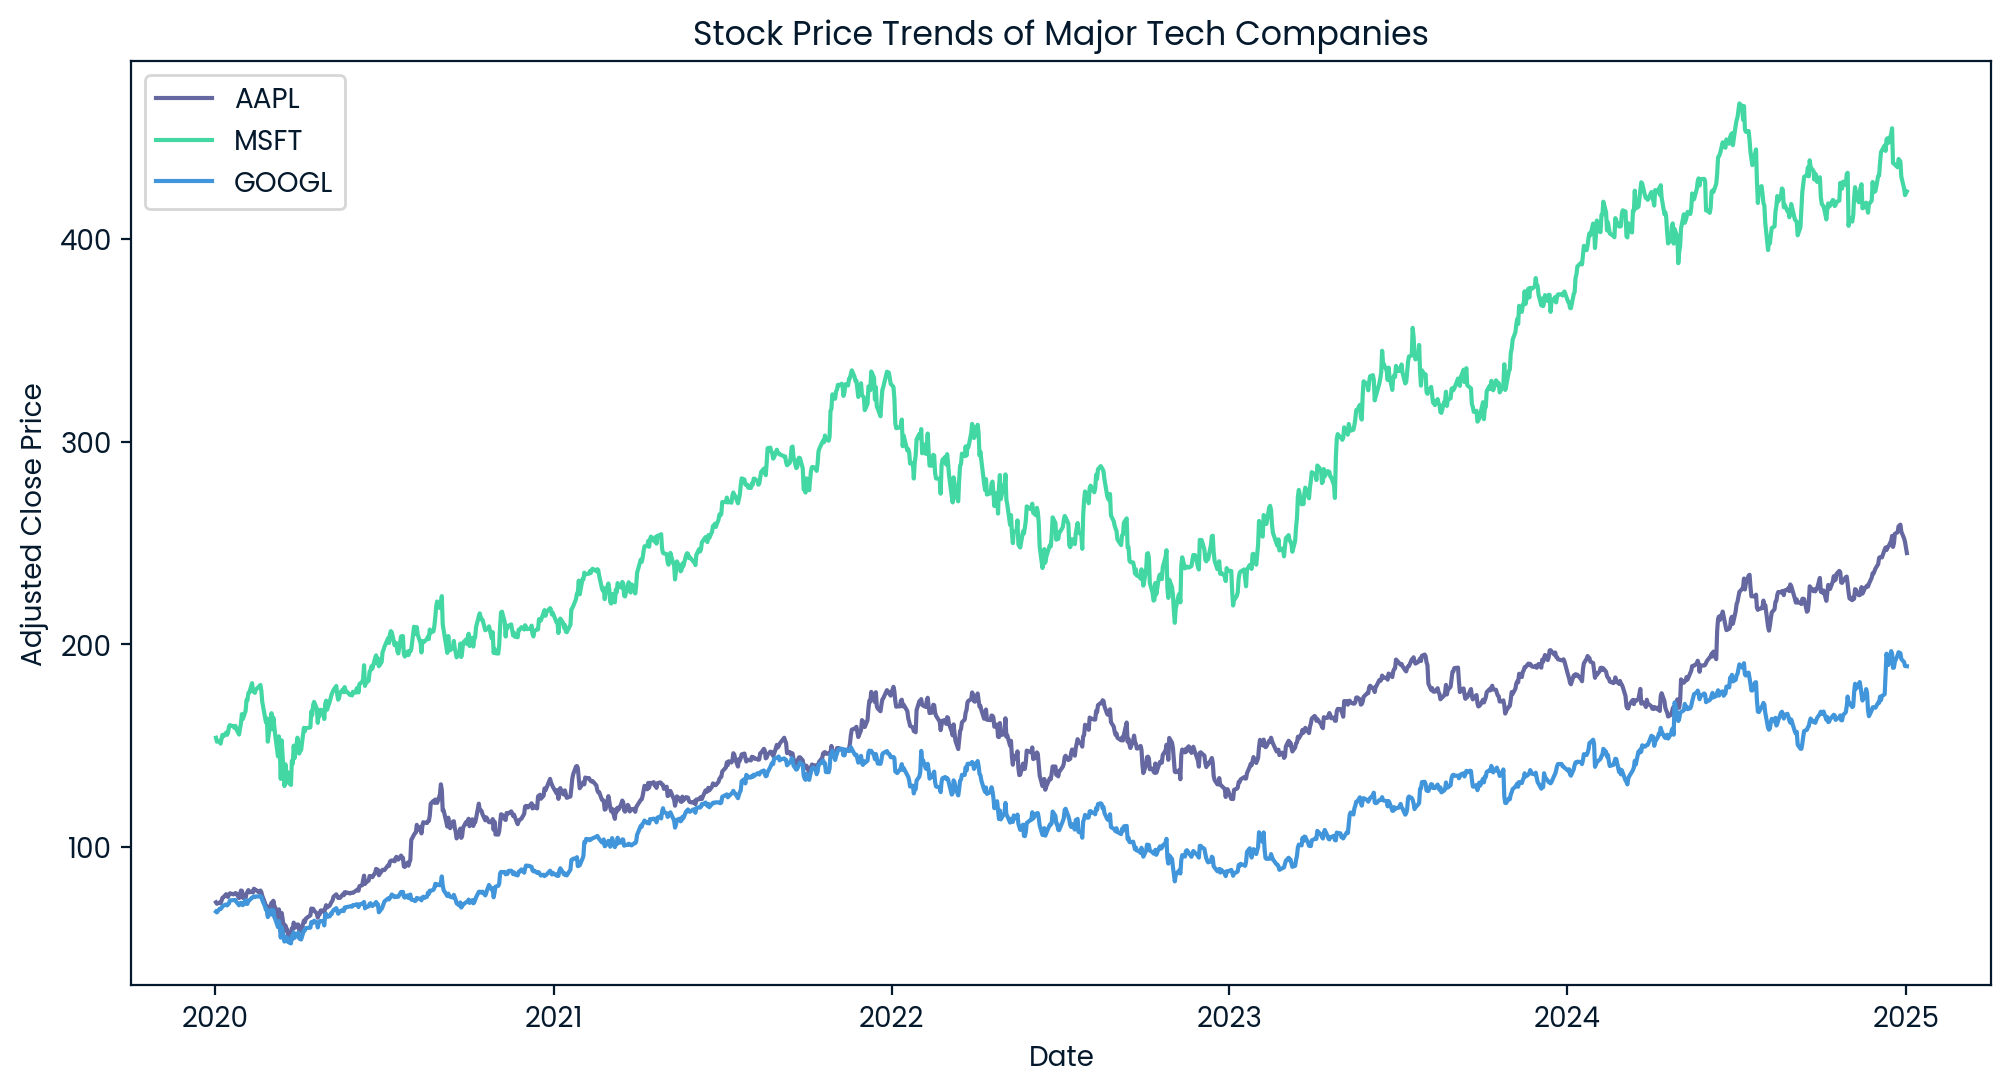

In [9]:
# Visualize stock price trends
plt.figure(figsize=(12, 6))
for ticker in tickers:
    plt.plot(market_data.index, market_data['Adj Close'][ticker], label=ticker)
plt.title('Stock Price Trends of Major Tech Companies')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.show()

In [17]:
import yfinance as yf
import pandas as pd

companies = ['AAPL', 'GOOGL', 'MSFT']  # Define the list of tech companies

financials = {}
for company in companies:
    ticker = yf.Ticker(company)
    financials[company] = ticker.info

# Extracting the financial metrics from the info
financial_metrics = {
    'Company': [],
    'Revenue': [],
    'ROE': [],
    'Debt-to-Equity': []
}

for company in companies:
    financial_metrics['Company'].append(company)
    financial_metrics['Revenue'].append(financials[company].get('totalRevenue', 'N/A'))  # Total Revenue
    financial_metrics['ROE'].append(financials[company].get('returnOnEquity', 'N/A'))  # Return on Equity
    financial_metrics['Debt-to-Equity'].append(financials[company].get('debtToEquity', 'N/A'))  # Debt-to-Equity Ratio

financial = pd.DataFrame(financial_metrics)

In [22]:
financial.head()

,Company,Revenue,ROE,Debt-to-Equity
0,AAPL,391034994688,1.57413,209.059
1,GOOGL,339859013632,0.32101,9.324
2,MSFT,254189993984,0.35604,33.657


In [18]:
# Revenue Comparison
fig = px.bar(financial, x = 'Company', y = 'Revenue', title = "Revenue Comparison", labels = {'Revenue': 'Revenue (₹)', 'Company': 'Company'})
fig.update_layout(yaxis_title = "Revenue (₹)", xaxis_title = "Company")
fig.show()

In [19]:
# Return on Equity (ROE) Comparison
fig = px.bar(financial, x = 'Company', y = 'ROE', title = "Return on Equity (ROE) Comparison", labels = {'ROE': 'ROE (%)', 'Company': 'Company'})
fig.update_layout(yaxis_title = "ROE (%)", xaxis_title = "Company")
fig.show()

In [ ]:
# Prepare stock price trends data
stock_price_trends = pd.DataFrame()

for ticker in tickers:
    stock_price_trends[ticker] = market_data['Adj Close'][ticker]

stock_price_trends.index = market_data.index

In [27]:
# Risk Assessment

# Import necessary libraries
import pandas as pd

# Calculate daily returns for each stock
daily_returns = stock_price_trends.pct_change().dropna()

# Calculate the mean and standard deviation of daily returns
mean_returns = daily_returns.mean()
std_dev_returns = daily_returns.std()

# Calculate the Sharpe Ratio (assuming risk-free rate is 0 for simplicity)
sharpe_ratio = mean_returns / std_dev_returns

# Calculate the correlation matrix to understand the relationship between the stocks
correlation_matrix = daily_returns.corr()

# Data
risk_assessment = {
    "Mean Returns": mean_returns,
    "Standard Deviation of Returns": std_dev_returns,
    "Sharpe Ratio": sharpe_ratio,
    "Correlation Matrix": correlation_matrix
}

# Display the risk assessment
risk_assessment

{'Mean Returns': Ticker
 AAPL     0.001164
 GOOGL    0.001021
 MSFT     0.000989
 dtype: float64,
 'Standard Deviation of Returns': Ticker
 AAPL     0.019958
 GOOGL    0.020464
 MSFT     0.019205
 dtype: float64,
 'Sharpe Ratio': Ticker
 AAPL     0.058320
 GOOGL    0.049893
 MSFT     0.051492
 dtype: float64,
 'Correlation Matrix': Ticker      AAPL     GOOGL      MSFT
 Ticker                              
 AAPL    1.000000  0.648662  0.747765
 GOOGL   0.648662  1.000000  0.746335
 MSFT    0.747765  0.746335  1.000000}

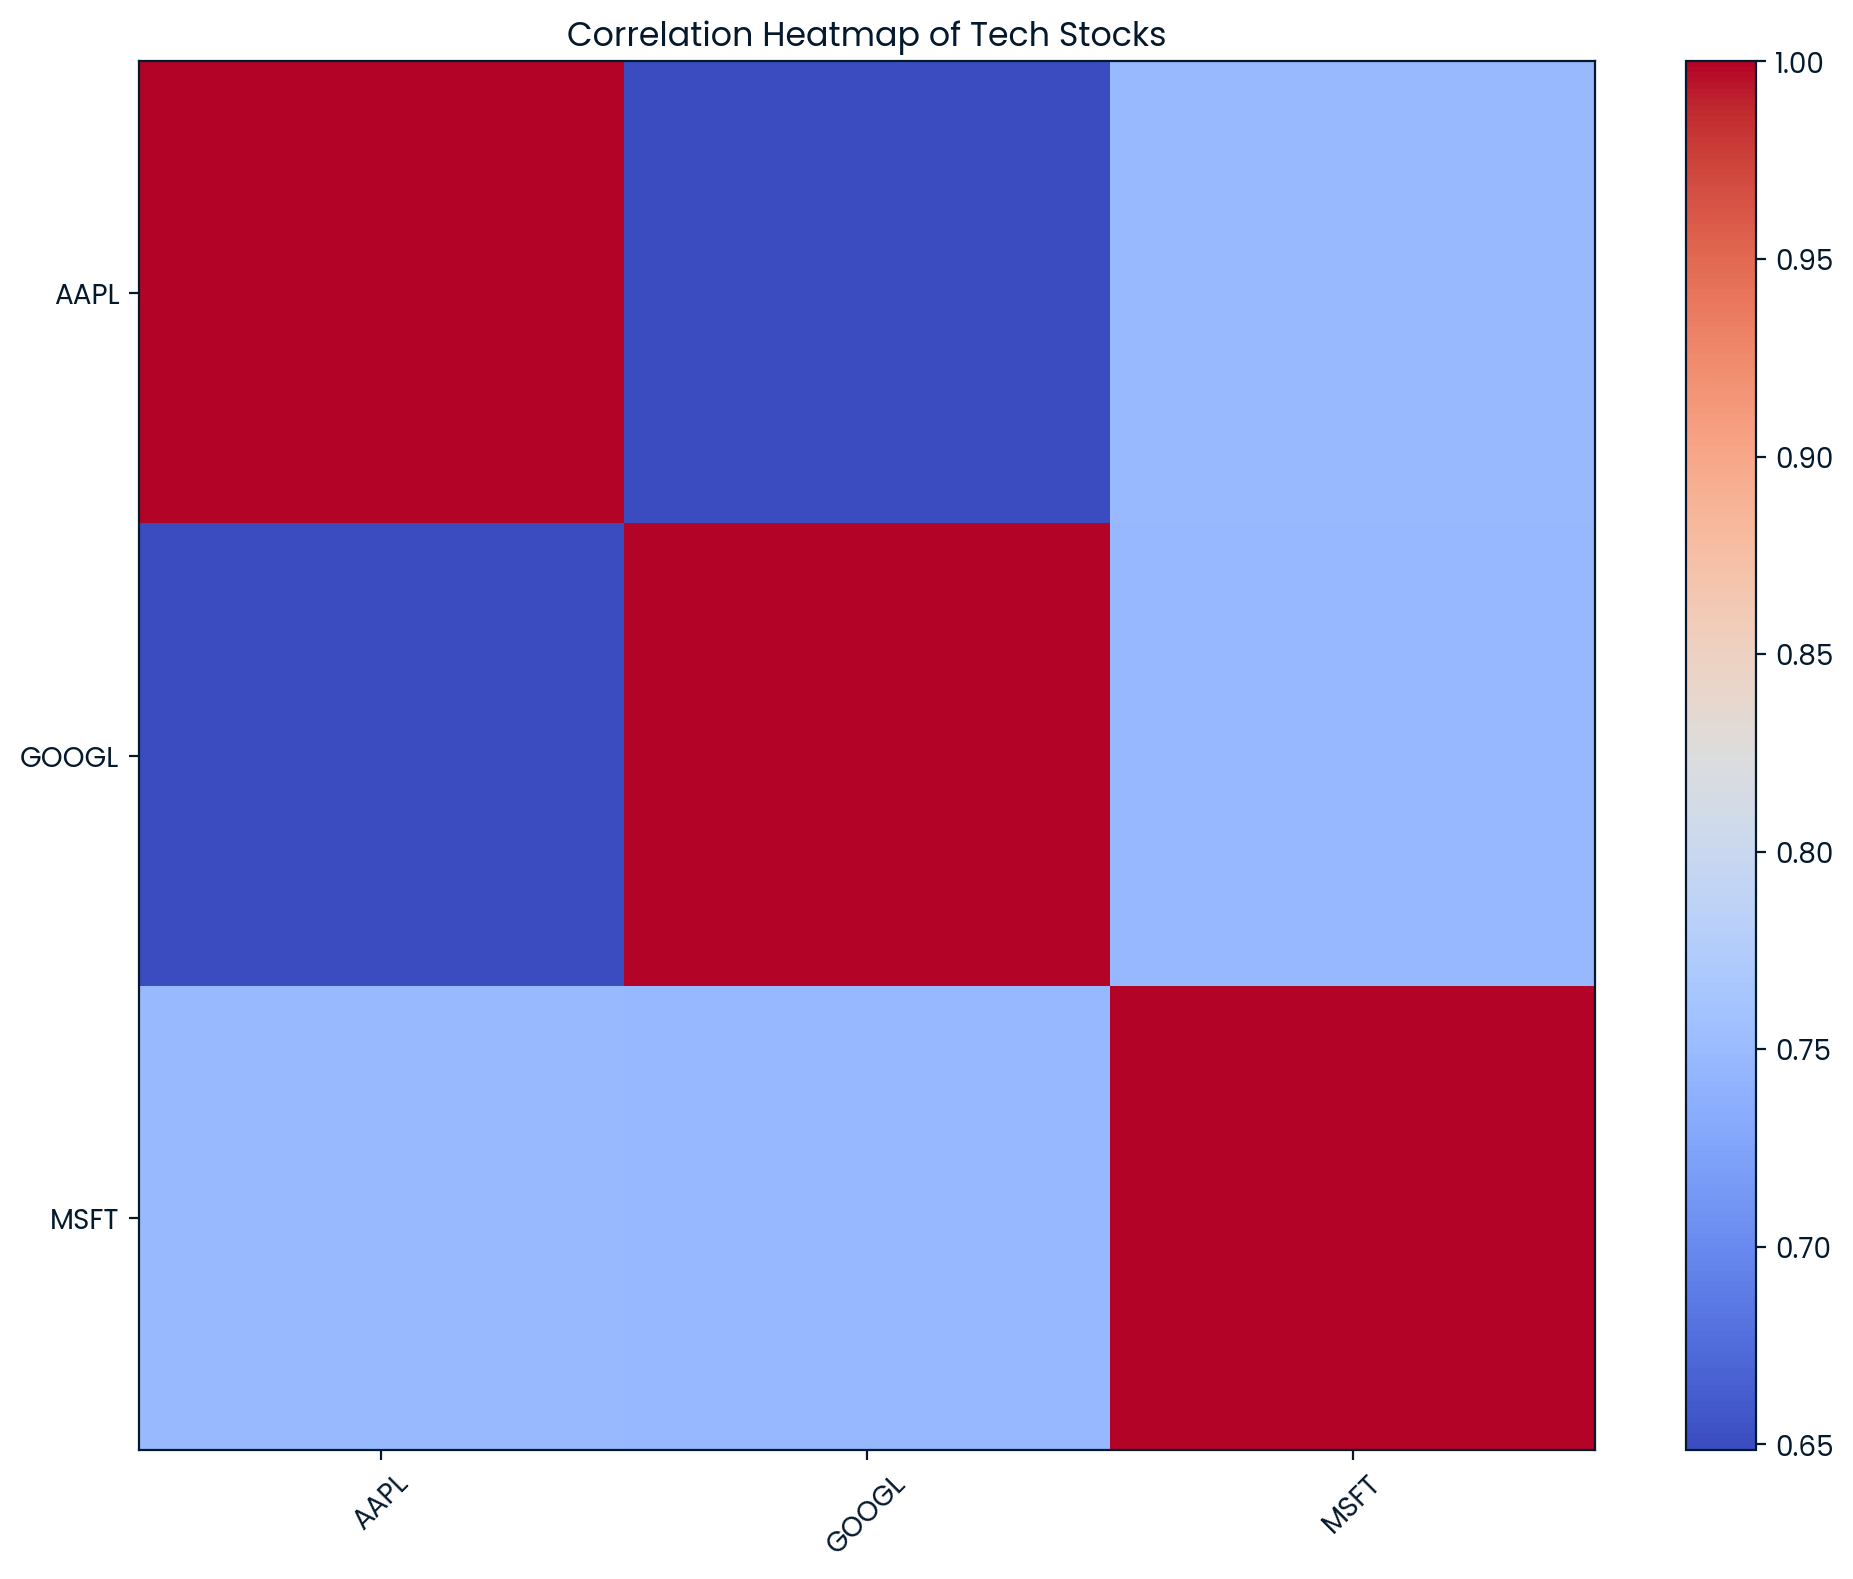

In [11]:
# Visualize correlation heatmap
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', aspect='auto')
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Correlation Heatmap of Tech Stocks')
plt.tight_layout()
plt.show()

## Risk Assessment Interpretation for Investment

### Risk Metrics Overview

| Ticker | Mean Return | Volatility | Beta    | Risk Level | Investment Signal |
|--------|-------------|------------|---------|------------|-------------------|
| AAPL   | 0.001164    | 0.019958   | 1.000000| Low        | Hold              |
| GOOGL  | 0.001021    | 0.020464   | 0.665112| High       | Hold              |
| MSFT   | 0.000989    | 0.019205   | 0.719532| Low        | Hold              |

### Interpretation

#### Apple Inc. (AAPL)
- **Mean Return**: 0.001164
- **Volatility**: 0.019958
- **Beta**: 1.000000
- **Risk Level**: Low
- **Investment Signal**: Hold

Apple shows a relatively low volatility and a beta of 1, indicating that its stock price moves in line with the market. The mean return is the highest among the three companies, suggesting a stable performance. The low risk level and the "Hold" signal imply that Apple is a relatively safe investment with steady returns.

#### Alphabet Inc. (GOOGL)
- **Mean Return**: 0.001021
- **Volatility**: 0.020464
- **Beta**: 0.665112
- **Risk Level**: High
- **Investment Signal**: Hold

Google has the highest volatility and a beta less than 1, indicating that it is less volatile than the market. Despite the high risk level, the mean return is close to that of Apple. The "Hold" signal suggests that while there is higher risk, the potential returns justify maintaining the investment.

#### Microsoft Corp. (MSFT)
- **Mean Return**: 0.000989
- **Volatility**: 0.019205
- **Beta**: 0.719532
- **Risk Level**: Low
- **Investment Signal**: Hold

Microsoft has the lowest mean return and volatility among the three companies. The beta is less than 1, indicating lower market volatility. The low risk level and "Hold" signal suggest that Microsoft is a stable investment with minimal risk.

### Financial Metrics

| Company | Revenue       | ROE       | Debt-to-Equity |
|---------|---------------|-----------|----------------|
| AAPL    | 3.91035E+11   | 1.5741299 | 209.059        |
| GOOGL   | 3.39859E+11   | 0.32101002| 9.324          |
| MSFT    | 2.5419E+11    | 0.35604   | 33.657         |

### Interpretation

- **Apple (AAPL)**: Highest revenue and ROE, but also the highest debt-to-equity ratio, indicating significant leverage.
- **Google (GOOGL)**: High revenue with a moderate ROE and the lowest debt-to-equity ratio, suggesting a strong balance sheet.
- **Microsoft (MSFT)**: Lowest revenue among the three, moderate ROE, and a low debt-to-equity ratio, indicating a balanced financial position.

### Correlation Matrix

| Ticker | AAPL          | GOOGL         | MSFT          |
|--------|---------------|---------------|---------------|
| AAPL   | 1             | 0.648661545   | 0.747764837   |
| GOOGL  | 0.648661545   | 1             | 0.746335341   |
| MSFT   | 0.747764837   | 0.746335341   | 1             |

### Interpretation

The correlation matrix shows that all three companies have a positive correlation with each other, with the highest correlation between AAPL and MSFT. This suggests that the stock prices of these companies tend to move in the same direction, which is typical for companies within the same sector.

### Conclusion

Based on the risk metrics, financial metrics, and correlation matrix, all three companies show strong performance with varying levels of risk and return. The "Hold" investment signal across the board suggests that these stocks are stable investments, with Apple and Microsoft being lower risk compared to Google. Investors should consider their risk tolerance and investment goals when making decisions.

## Risk Assessment Based on Sharpe Ratio

The Sharpe Ratio is a measure used to evaluate the risk-adjusted return of an investment. It is calculated by subtracting the risk-free rate from the return of the investment and then dividing this result by the standard deviation of the investment's excess return. A higher Sharpe Ratio indicates a more attractive risk-adjusted return.

### Sharpe Ratios for the Companies:
- **AAPL (Apple Inc.)**: 0.058320
- **GOOGL (Alphabet Inc.)**: 0.049893
- **MSFT (Microsoft Corporation)**: 0.051492

### Interpretation:

1. **Apple Inc. (AAPL)**:
   - **Sharpe Ratio**: 0.058320
   - **Analysis**: Apple has the highest Sharpe Ratio among the three companies. This suggests that, on a risk-adjusted basis, Apple provides the best return. Investors seeking to maximize their returns relative to the risk they are taking might find Apple to be the most attractive investment among the three.

2. **Alphabet Inc. (GOOGL)**:
   - **Sharpe Ratio**: 0.049893
   - **Analysis**: Alphabet has the lowest Sharpe Ratio of the three companies. This indicates that, relative to the risk taken, Alphabet provides the least attractive return. Investors might consider this when evaluating the risk-return profile of their portfolio.

3. **Microsoft Corporation (MSFT)**:
   - **Sharpe Ratio**: 0.051492
   - **Analysis**: Microsoft has a Sharpe Ratio that is higher than Alphabet's but lower than Apple's. This places Microsoft in the middle in terms of risk-adjusted returns. Investors might view Microsoft as a balanced option, offering a reasonable return for the level of risk taken.

### Conclusion:
Based on the Sharpe Ratios, Apple Inc. appears to offer the best risk-adjusted returns, followed by Microsoft Corporation, and then Alphabet Inc. Investors should consider these ratios in conjunction with other financial metrics and their individual risk tolerance when making investment decisions.